<a href="https://colab.research.google.com/github/wycui68/Case-Study/blob/main/Product_Analysis_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Product and Retail Data Analysis

Source:
https://www.kaggle.com/carrie1/ecommerce-data/downloads/ecommerce-data.zip/1

https://www.kaggle.com/admond1994/e-commerce-data-eda/notebook

About out Data
- Company - UK-based and registered non-store online retail
- Products for selling - Mainly all-occasion gifts
- Customers - Most are wholesalers (local or international)
- Transactions Period - 1st Dec 2010 - 9th Dec 2011 (One year)

In [71]:
# Import our modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#import missingno as msno # missing data visualization module for Python
import pandas_profiling

import gc
import datetime

%matplotlib inline
# Using ggplot's style
plt.style.use('ggplot')

In [72]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/ecommerce_data.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

df = pd.read_csv("ecommerce_data.csv", encoding = 'ISO-8859-1')


In [73]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [75]:
df.isnull().sum().sort_values(ascending = False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [76]:
df[df.isnull().any(axis = 1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [77]:
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate, format = '%m/%d/%Y %H:%M')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [79]:
df_no_missing = df.dropna()

In [80]:
df_no_missing.isnull().sum().sort_values(ascending = False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [81]:
df_no_missing["CustomerID"] = df_no_missing["CustomerID"].astype("int64")

In [82]:
df_no_missing.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [83]:
# Rename the dataframe
df2 = df_no_missing.copy()

In [84]:
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


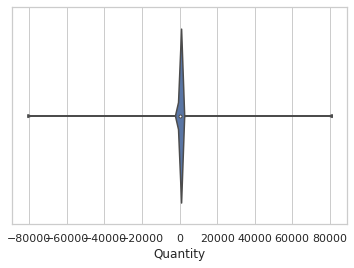

In [85]:
sns.set(style = "whitegrid")
ax = sns.violinplot(x = df2["Quantity"])

In [86]:
# Remove negative quantities

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


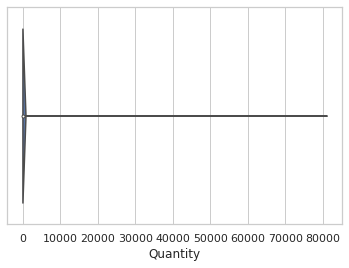

In [87]:
sns.set(style = "whitegrid")
ax = sns.violinplot(x = df2["Quantity"])

In [88]:
df2["AmountSpent"] = df2["Quantity"] * df2["UnitPrice"]
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [89]:
df2["month_year"] = df2["InvoiceDate"].dt.to_period("M")
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [90]:
L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [91]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   month_year   397924 non-null  period[M]     
 10  year         397924 non-null  int64         
 11  month        397924 non-null  int64         
 12  day          397924 non-null  int64         
 13  dayofweek    397924 non-null  int64         
 14  dayofyear    397924 non-null  int64         
 15  weekofyear   397924 non-null  int6

In [93]:
# +1 to make Monday=1.....until Sunday=7
df2["dayofweek"] = df2["dayofweek"] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


# Exploration and Analysing the Data

In [94]:
sales_per_cust = df2.groupby(["CustomerID", "Country"], as_index = False)["InvoiceNo"].count().sort_values(["InvoiceNo"], ascending = False)
sales_per_cust.columns = ["CustomerID", "Country", "NumberOfSales"]
sales_per_cust

,CustomerID,Country,NumberOfSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
...,...,...,...
605,13135,United Kingdom,1
643,13185,United Kingdom,1
3969,17763,United Kingdom,1
3962,17752,United Kingdom,1


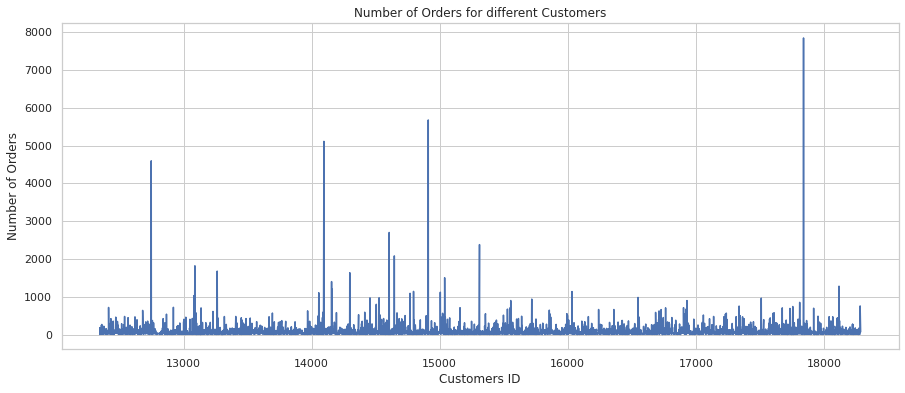

In [95]:
orders = df2.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

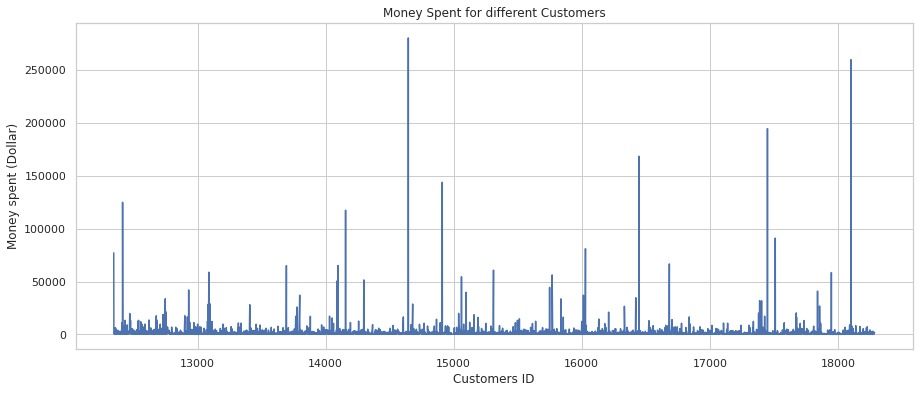

In [96]:
# Visualizing Money Spent for all Customer
money_spent = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [97]:
# Consolidating the number of Sales Made per customer (Revenue)
# we use use index=False, to indicate to the groupby that we don't want to set the column ID as index
spent_per_cust = df2.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head()

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


# Purchase Pattern

In [98]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [99]:
# Insert a new column as our 3rd row (index 2) with year_month by joining our year with month from our InvoiceDate field
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [100]:
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


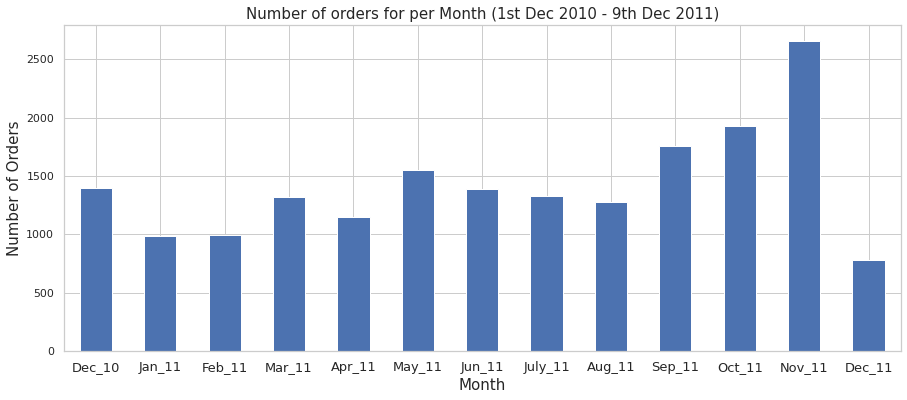

In [104]:
# the number of order per month

ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

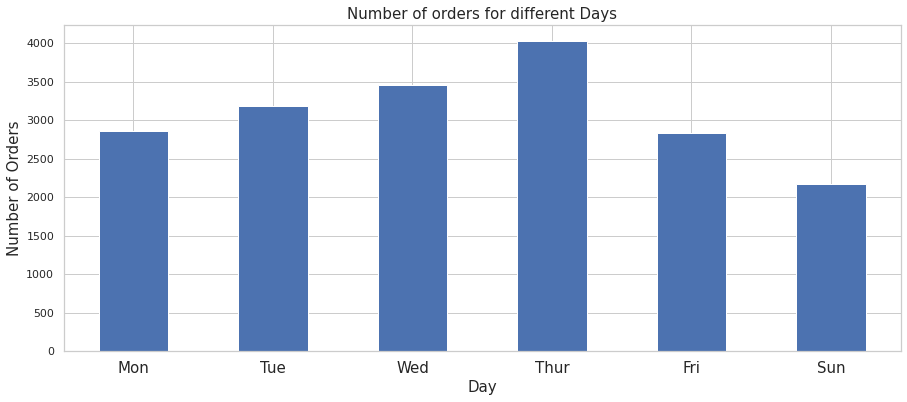

In [107]:
# the number of orders per day of the week
# Create a plot for the above
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind = 'bar', figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

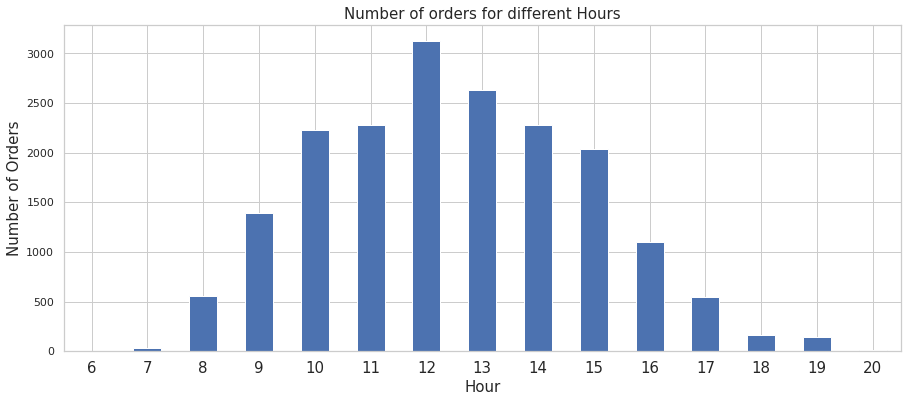

In [109]:
# Let's Plot the  number of orders per hour
ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

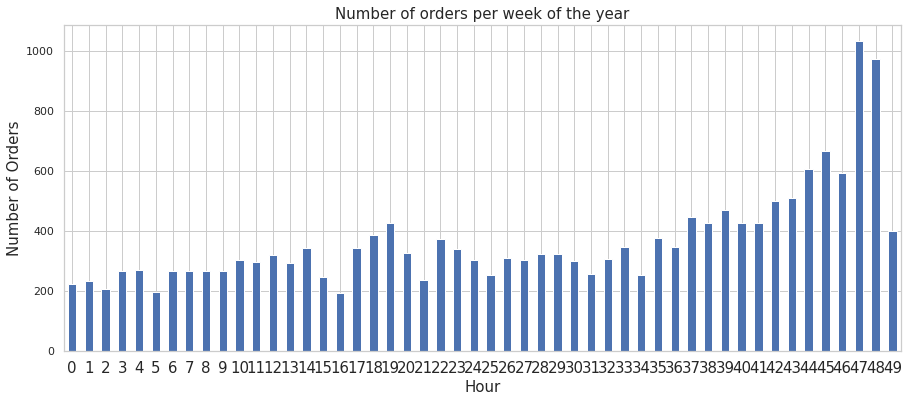

In [110]:
# Number of sales per week of the year
ax = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)
plt.show()

## Unit Price

In [111]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

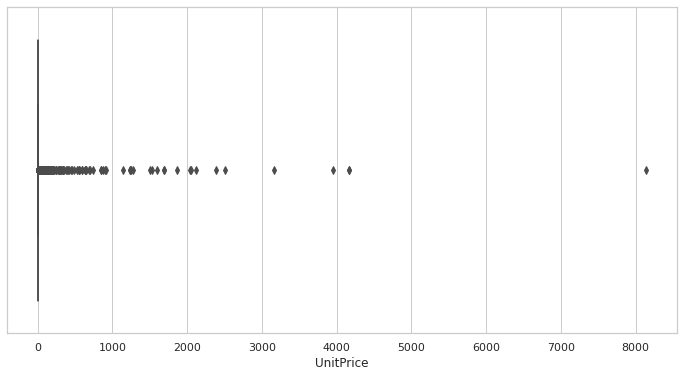

In [112]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [113]:
# What are the free items
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,month_year,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


In [114]:
# See when these free items were given out
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

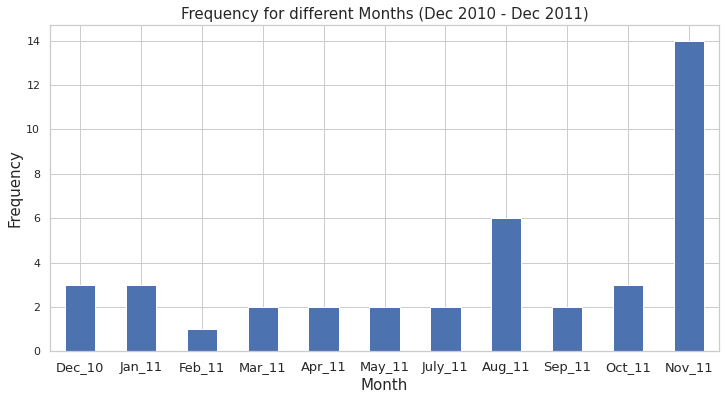

In [115]:
ax = df_free.year_month.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

## Analysis per Country

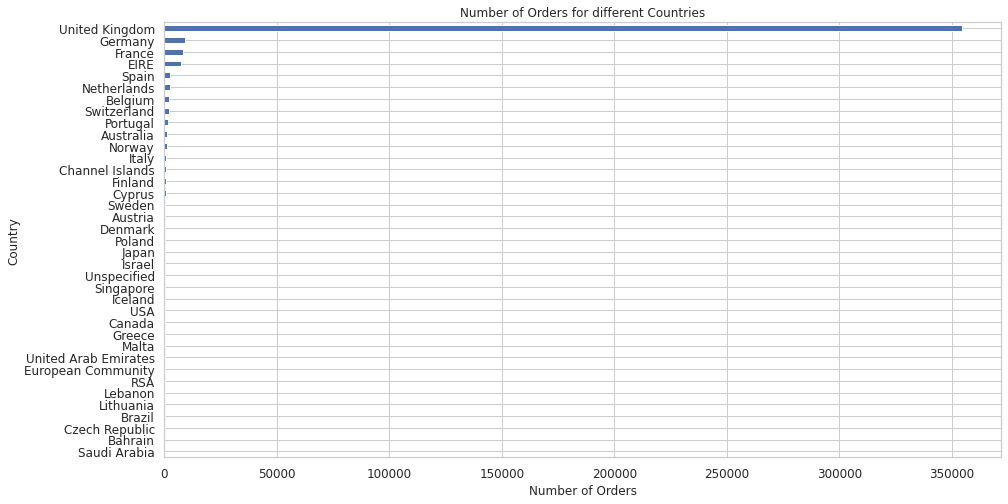

In [119]:
group_country_orders = df2.groupby("Country")["InvoiceDate"].count().sort_values()

plt.subplots(figsize = (15,8))
group_country_orders.plot(kind = "barh", fontsize = 12)
plt.xlabel("Number of Orders", fontsize = 12)
plt.ylabel("Country", fontsize = 12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

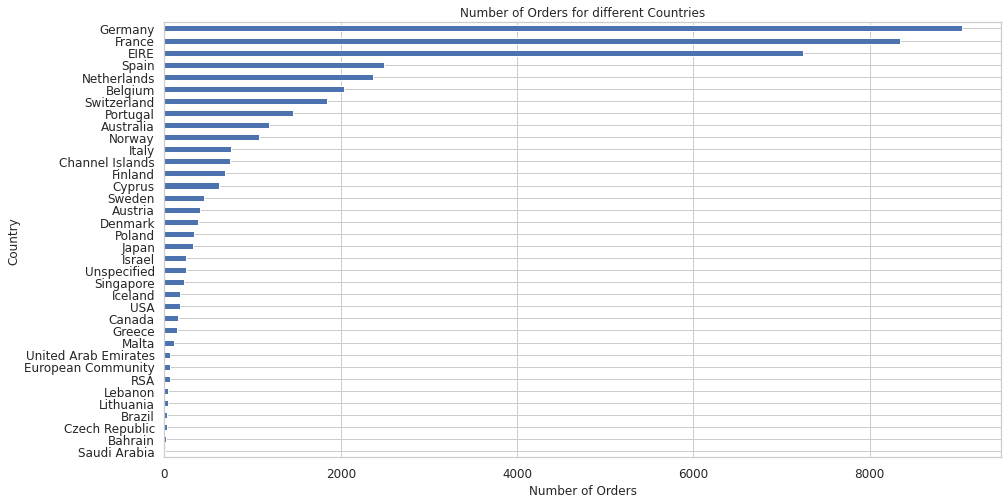

In [121]:
# Excluding UK now

group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind = 'barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

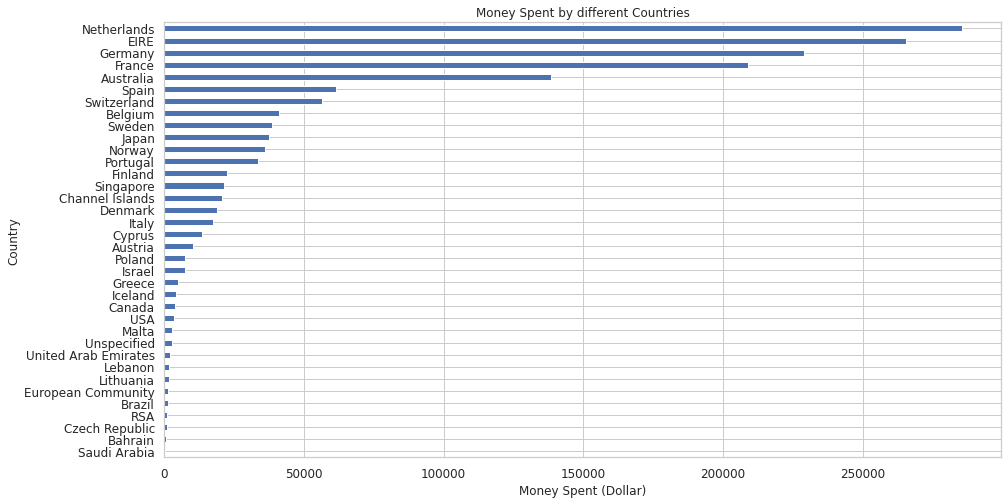

In [122]:
# Amount spent by each country (without UK)
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind = 'barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

## Repeat Customers

In [123]:
# Get our date range for our data
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [128]:
# Get total amount spent per invoice and associate it with CustomerID and Country
invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({"AmountSpent":sum, "CustomerID":max, "Country":max}).reset_index()
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047,United Kingdom


In [129]:
# Sort on Amount spent, this gives us the largest invoices
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

,InvoiceNo,InvoiceDate,AmountSpent,CustomerID,Country
1911,541431,2011-01-18 10:01:00,77183.60,12346,United Kingdom
7949,556444,2011-06-10 15:28:00,38970.00,15098,United Kingdom
12446,567423,2011-09-20 11:05:00,31698.16,17450,United Kingdom
8135,556917,2011-06-15 13:37:00,22775.93,12415,Australia
14487,572209,2011-10-21 12:08:00,22206.00,18102,United Kingdom
12438,567381,2011-09-20 10:12:00,22104.80,17450,United Kingdom
10869,563614,2011-08-18 08:51:00,21880.44,12415,Australia
5481,550461,2011-04-18 13:20:00,21535.90,15749,United Kingdom
14399,572035,2011-10-20 12:03:00,20277.92,14646,Netherlands
10637,563076,2011-08-11 16:12:00,19150.66,14646,Netherlands


In [131]:
# We set our index to our invoice date
# And use Grouper(freq='M') groups data by the index 'InvoiceDate' by Month
# We then group this data by CustomerID and count the number of unique repeat customers for that month (data is the month end date)
# The filter fucntion allows us to subselect data by the rule in our lambda function i.e. those greater than 1 (repeat customers)

monthly_repeat_customers_df = invoice_customer_df.set_index("InvoiceDate").groupby([pd.Grouper(freq = "M"), "CustomerID"]).filter(lambda x : len(x) > 1).resample("M").nunique()["CustomerID"]

In [132]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [134]:
# Number of Unique customers per month

monthly_unique_customers_df = df2.set_index("InvoiceDate")["CustomerID"].resample("M").nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [135]:
# Ratio of Repeat to Unique customers
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

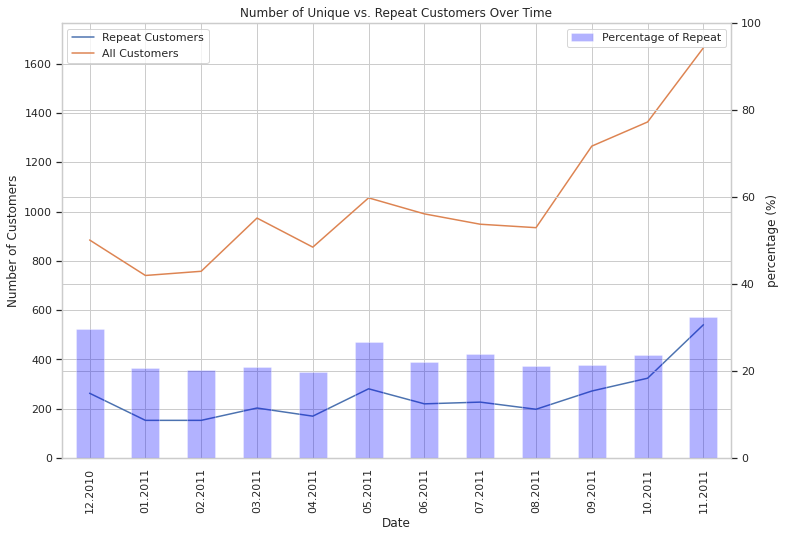

In [136]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [137]:
# The relationship between the revenue and repeat customers

monthly_revenue_df = df2.set_index("InvoiceDate")["AmountSpent"].resample("M").sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

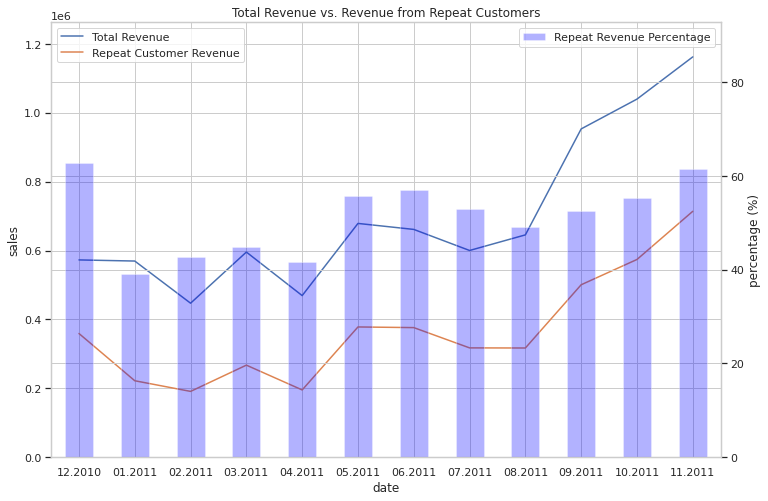

In [138]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

## Item Trend

In [139]:
date_item_df = df2.set_index("InvoiceDate").groupby([pd.Grouper(freq = "M"), "StockCode"])["Quantity"].sum()

date_item_df.head()

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
Name: Quantity, dtype: int64

In [140]:
# Rank items by the last month's sales
last_month_sorted_df = date_item_df.loc["2011-11-30"]
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(["Quantity"], ascending = False).head()

,InvoiceDate,StockCode,Quantity
2371,2011-11-30,84826,12551
1567,2011-11-30,23084,12393
827,2011-11-30,22197,8458
738,2011-11-30,22086,5919
2488,2011-11-30,85099B,5678


In [141]:
# Let's look at the top 5 items sale per month 

date_item_df = df.loc[df['StockCode'].isin(['23084', '84826', '22197', '22086', '85099B'])].set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df

InvoiceDate  StockCode
2010-12-31   22086         2453
             22197         2731
             84826          306
             85099B        2126
2011-01-31   22086           24
             22197         1809
             84826          480
             85099B        2639
2011-02-28   22086            5
             22197         2663
             84826           66
             85099B        3078
2011-03-31   22086           87
             22197         2798
             84826           60
             85099B        5281
2011-04-30   22086          -27
             22197         1856
             84826            1
             85099B        2452
2011-05-31   22086           17
             22197         6848
             23084         1131
             85099B        3617
2011-06-30   22086          344
             22197         2092
             23084         1693
             84826            4
             85099B        3676
2011-07-31   22086          377
             2219

In [142]:
# Now let's generate a monthly trend of each of the top 5 items
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2453.0,2731.0,0.0,306.0,2126.0
2011-01-31,24.0,1809.0,0.0,480.0,2639.0
2011-02-28,5.0,2663.0,0.0,66.0,3078.0
2011-03-31,87.0,2798.0,0.0,60.0,5281.0
2011-04-30,-27.0,1856.0,0.0,1.0,2452.0
2011-05-31,17.0,6848.0,1131.0,0.0,3617.0
2011-06-30,344.0,2092.0,1693.0,4.0,3676.0
2011-07-31,377.0,1862.0,318.0,2.0,3126.0
2011-08-31,370.0,5416.0,1783.0,72.0,5401.0


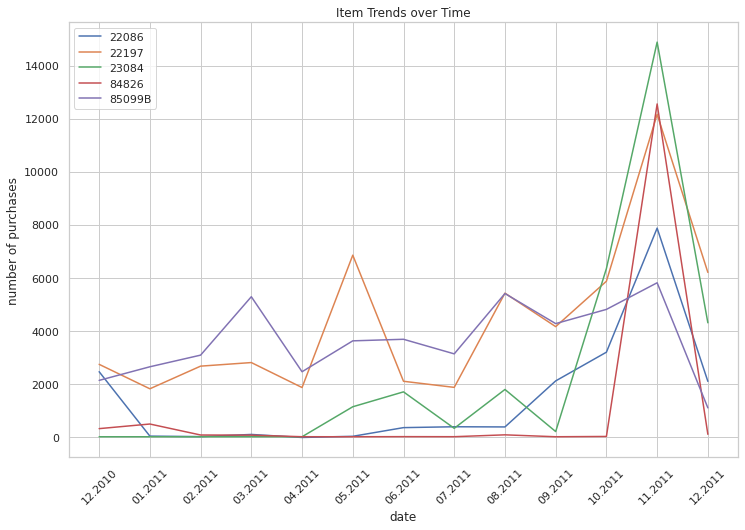

In [143]:
# Plot the above information
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

plt.show()